<a href="https://colab.research.google.com/github/Prethumnan/Social-network-ads/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import roc_auc_score

**Importing the dataset**

In [3]:
data=pd.read_csv("Social_Network_Ads.csv")

In [4]:
data["Gender"]=data["Gender"].replace({"Male":1,"Female":0})
data.drop(["User ID","Gender"],axis=1,inplace=True)

**Splitting the dataset into the Training set and Test set**

In [5]:
x=data.drop("Purchased",axis=1)
y=data["Purchased"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**Feature Scaling**

In [6]:
scaler=MinMaxScaler()
scaler.fit(x_train)
for i in ["Age","EstimatedSalary"]:
  x_train[[i]]=scaler.fit_transform(x_train[[i]])
scaler.fit(x_test)
for i in ["Age","EstimatedSalary"]:
  x_test[[i]]=scaler.fit_transform(x_test[[i]])

**Fitting Random Forest to the Training set**

In [7]:
depth=[]
score=[]
for i in range(2,10):
  model=RandomForestClassifier(max_depth=i)
  model.fit(x_train,y_train)
  depth.append(i)
  score.append(np.mean(cross_val_score(model,x_train,y_train)))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


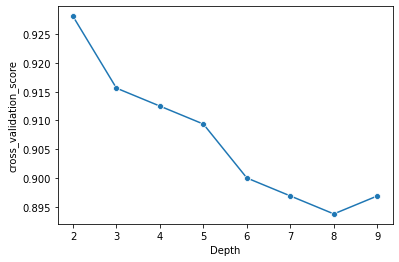

In [8]:
plt.xlabel("Depth")
plt.ylabel("cross_validation_score")
sns.lineplot(depth,score,marker="o")

In [9]:
model=RandomForestClassifier(max_depth=3)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=3)

In [10]:
print("Training score : ",model.score(x_train,y_train))
print("testing score : ",model.score(x_test,y_test))

Training score :  0.9375
testing score :  0.8375


**Predicting the Test set results**

In [11]:
y_pred=model.predict(x_test)
pd.DataFrame({"Actual":y_test,"Predicted":y_pred})

,Actual,Predicted
373,1,1
213,0,0
229,1,0
203,0,0
39,0,0
...,...,...
34,0,1
391,1,1
20,1,1
267,0,0


In [12]:
roc_auc_score(y_test,y_pred)

0.8337912087912087

**Making the Confusion Matrix**

In [13]:
confusion_matrix(y_test,y_pred)

array([[44,  8],
       [ 5, 23]])

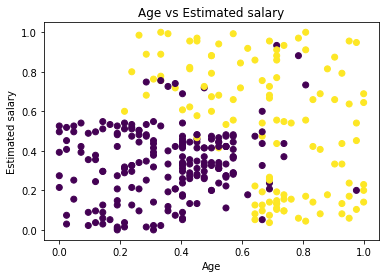

In [14]:
#visualization of training data
plt.xlabel("Age")
plt.ylabel("Estimated salary")
plt.title("Age vs Estimated salary")
plt.scatter(x_train["Age"],x_train["EstimatedSalary"],c=y_train)

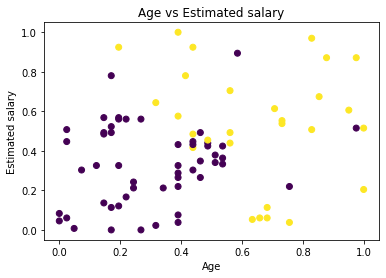

In [16]:
#visualization of testing data(Actual)
plt.xlabel("Age")
plt.ylabel("Estimated salary")
plt.title("Age vs Estimated salary")
plt.scatter(x_test["Age"],x_test["EstimatedSalary"],c=y_test)

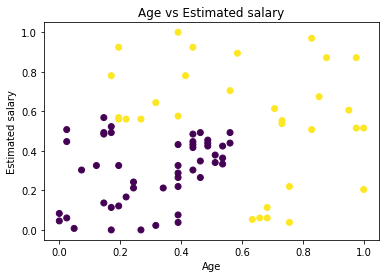

In [17]:
#visualization of testing data(Predicted)
plt.xlabel("Age")
plt.ylabel("Estimated salary")
plt.title("Age vs Estimated salary")
plt.scatter(x_test["Age"],x_test["EstimatedSalary"],c=y_pred)